# **German Sign Language Translator**

TechLabs Düsseldorf - AI Track Summer 2022 
 
*Annabel & Iffat*

This notebook seeks to train a neural network to interpret the German sign language's static alphabet. 




---



1. **Preparation**

2. **Exploratory Analysis**

3. **Dataset Split**
 
  3.1. Successful Attempt

  3.2. First Attempt

4. **Building Our Model**
  
  4.1. Successful Attempt: Spiking Neural Network Model (SNN)
  
  4.2. First Attempt: Convolutional Neural Network Model (CNN)

5. **Outlook: Webcamera Incorporation**







## 1. Preparation

First, we connect to our GoogleDrive, where our datasets are stored. Then we load the important libraries.

In [168]:
# Connect to GoogleDrive
from google.colab import drive

# This will prompt for authorization
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [169]:
# Load libraries
import numpy as np
from numpy import linalg as la
import pandas as pd
import csv
import cv2
import seaborn as sns
import matplotlib.pyplot as plt
from IPython.display import Image
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split

In this step, we change the working directory to where the data is in order to simplify the work process.

In [170]:
# Change working directory to where the data is
%cd /content/drive/MyDrive/GSL

/content/drive/MyDrive/GSL


In [171]:
# Check current working directory
!pwd

/content/drive/MyDrive/GSL


In [172]:
# Unzip the data folder
# !unzip *.zip

## 2. Exploratory Analysis

In this section, we explore our dataset statistics.

Visualising the data shows there's only 24 signs.
The letters J & Z are not included because they require motion.

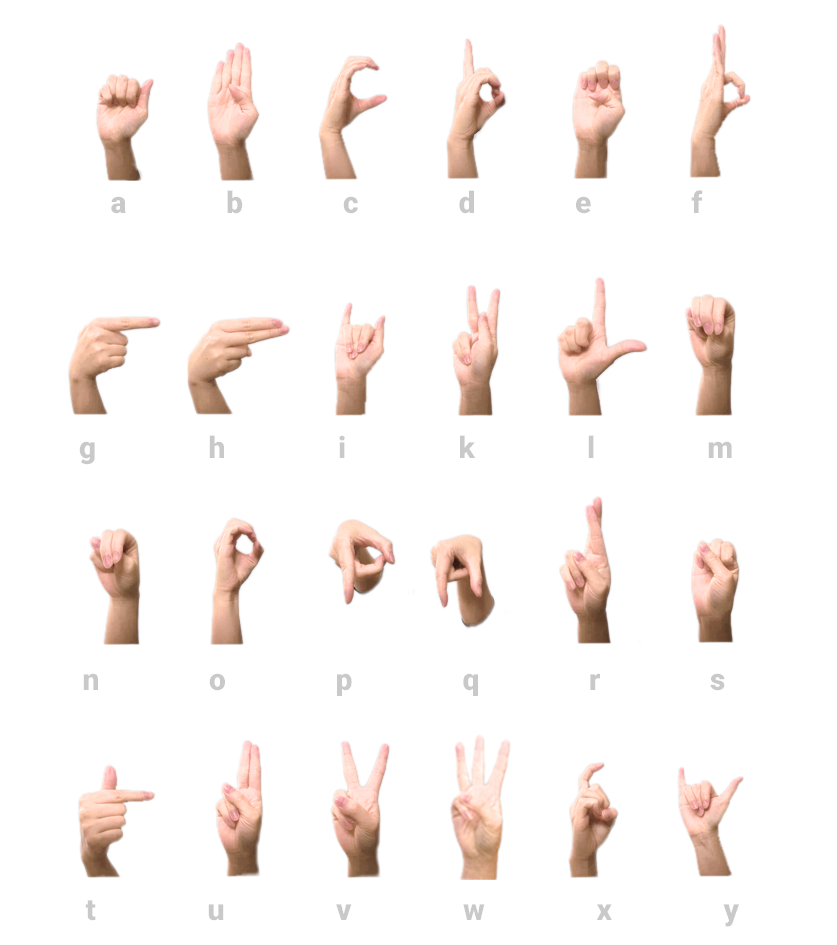

In [173]:
# Visualisation training data
Image("german_sign_language_alphabet.png")

In [ ]:
# Use panda to read csv file
gsl = pd.read_csv('german_sign_language.csv')
gsl = gsl.sort_values('label')
gsl.head()

,label,coordinate 0,coordinate 1,coordinate 2,coordinate 3,coordinate 4,coordinate 5,coordinate 6,coordinate 7,coordinate 8,...,coordinate 53,coordinate 54,coordinate 55,coordinate 56,coordinate 57,coordinate 58,coordinate 59,coordinate 60,coordinate 61,coordinate 62
0,a,0.699433,0.694308,-5.125001e-07,0.648201,0.623592,-0.013627,0.620721,0.537524,-0.020144,...,-0.021148,0.727923,0.482140,-0.033280,0.721847,0.531752,-0.020166,0.734710,0.541902,-0.006052
2055,a,0.755843,0.946230,-7.576355e-07,0.596653,0.829356,-0.110176,0.508049,0.659072,-0.188538,...,-0.162198,0.919824,0.336035,-0.268012,0.894528,0.449780,-0.275523,0.853873,0.497211,-0.263470
2054,a,0.448966,0.805226,-6.289455e-07,0.553169,0.762983,-0.027101,0.617719,0.629570,-0.033553,...,-0.031833,0.432160,0.389669,-0.056247,0.446245,0.467956,-0.039005,0.441467,0.513121,-0.018076
2053,a,0.642172,0.783267,-9.619788e-07,0.548792,0.735658,-0.047853,0.478785,0.619713,-0.065149,...,-0.012934,0.690963,0.380511,-0.038585,0.675585,0.456306,-0.021411,0.669445,0.498558,-0.000121
2052,a,0.712538,0.878059,-1.231915e-06,0.591809,0.799211,-0.057425,0.506353,0.622470,-0.076480,...,-0.024946,0.815513,0.338214,-0.068287,0.788838,0.439484,-0.054281,0.773832,0.491689,-0.031064


In [ ]:
gsl.shape

(7306, 64)

The dataset contains 63 coordinates and 64 columns.

In [ ]:
num_samples = len(gsl)
classes = pd.unique(gsl.label)
print(f'Samples: {num_samples}')
print(f'Classes: {classes}')

Samples: 7306
Classes: ['a' 'b' 'c' 'd' 'e' 'f' 'g' 'h' 'i' 'k' 'l' 'm' 'n' 'o' 'p' 'q' 'r' 's'
 't' 'u' 'v' 'w' 'x' 'y']


There are 7306 samples, 24 different classes of letters and 64 columns in our dataset.

The following graph shows how many values there are in our data set - a little imbalanced but good to work with.

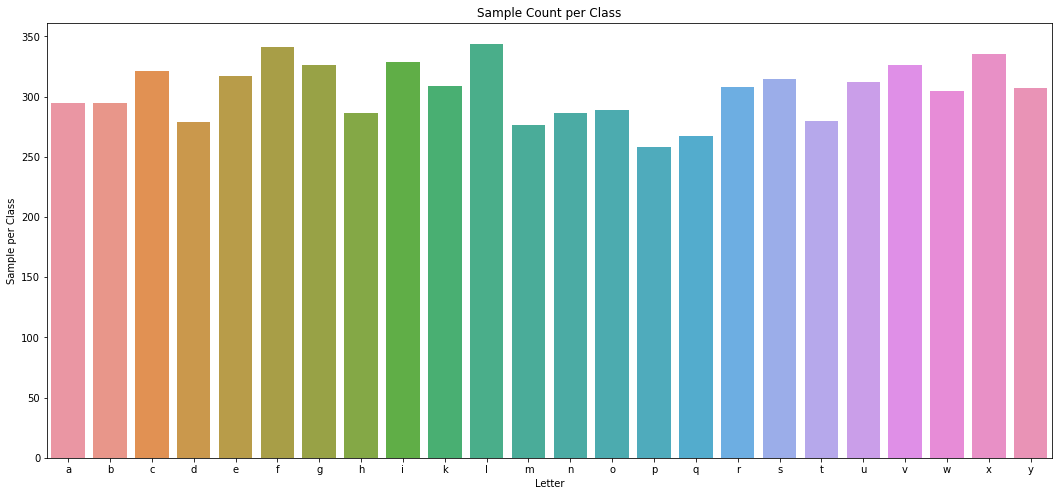

In [ ]:
plt.figure(figsize = (18,8))
p= sns.countplot(x =gsl.label)
p.set(xlabel = 'Letter')
p.set(ylabel = 'Sample per Class')
p.set(title ='Sample Count per Class')
plt.show()


## 3. Split of Dataset into Train & Test Data

### 3.1 Successful Attempt

The CSV file contains data as displayed using the head() function.
We will be splitting our data into labels & features.
Labels are the data which we want to predict - and features are the data we use to predict those labels.

In [ ]:
# Split the data into train and test data sets
train, test = train_test_split(gsl, test_size=0.30, random_state=101)

In [ ]:
# Save train & test as csv on the Drive
train.to_csv('train.csv',index=False)
test.to_csv('test.csv',index=False)

In [ ]:
# Get our training and test data
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [ ]:
print(test.shape)
print(train.shape)

(2192, 64)
(5114, 64)


We take a look at the data we have obtained with this.

Notice that train data has 5114 rows, whereas test data has 2192 rows.

The original data had 7306 rows - so this is a test size of 30%, which is exactly the result we wanted!

In [ ]:
# Using panda factorize method to encode the object as a categorical variable
ds_y = gsl.label.array
ds_y = pd.factorize(ds_y)[0]
ds_y = np.array(ds_y)
# Drop training labels from our training data so we can separate it
ds_x = gsl.drop(['label'], axis=1)
ds_x = ds_x.to_numpy()

Here, we transformed our labels because it's categorical - meaning a variable that can take on one of a limited & usually fixed number of possible values.
In this case limited by the amount of letters in the alphabet.

In [ ]:
# Explore data
print(ds_y.shape)
print(ds_x.shape)

(7306,)
(7306, 63)


In [ ]:
# Reshaping data into 3-dimensional shape 
num_samples = ds_x.shape[0]
dim = 3
landmarks = 21
ds_x = ds_x.reshape((num_samples, landmarks, dim))
print(ds_x.shape)

(7306, 21, 3)


In [ ]:
# Split the data into train & test data
x_train, x_test, y_train, y_test = train_test_split(ds_x, ds_y, test_size=0.3, random_state=101)
# Explore test & train data
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(5114, 21, 3)
(5114,)
(2192, 21, 3)
(2192,)


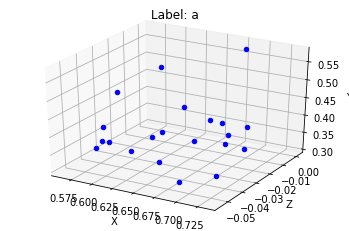

In [ ]:
# Creating 3D scatter plot to plot data points on 3 axes in the attempt to show the relationship between 3 variables
num = 10
example = ds_x[num]
label = ds_y[num]

fig = plt.figure()
ax = fig.add_subplot(projection='3d')

for vec in example:
    ax.scatter(vec[0], vec[2], vec[1], color='b')

plt.title(f'Label: {classes[label]}')
ax.set_xlabel('X')
ax.set_ylabel('Z')
ax.set_zlabel('Y')

plt.show()

### 3.2 Failed First Attempt - Split of Dataset into Train & Test Data

This is was our first failed attempt at splitting our dataset into train & test data. It worked for the American sign language alphabet and we tried to adjust it to our GSL data set. But various problems occured due to the different reshaping dimensions, so we tried another apporach and successfully build our model based on the dataset split as shown in the previous section 3.1.

Here, we transform our labels because it's categorical - meaning a variable that can take on one of a limited & usually fixed number of possible values.
In this case limited by the amount of letters in the alphabet.

In [ ]:
# Set our training labels, so we can take the label values & then drop the label column
# Change our shape
labels = train['label'].values
train.drop('label', axis=1, inplace=True)
train.shape

(5114, 63)

In [ ]:
unique_val= np.array(labels)
np.unique(unique_val)

array(['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'k', 'l', 'm', 'n',
       'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y'],
      dtype=object)

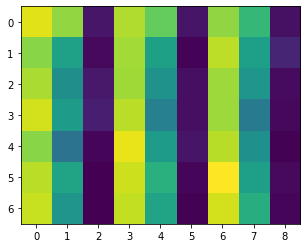

In [ ]:
# Transform our labels because it's categorical
# Categorical = variable that can take on one of a limited, and usually fixed, number of possible values
lbz = LabelBinarizer()
labels = lbz.fit_transform(labels)
# Set images to train.values
images = train.values
# Transform images to np.array by reshaping it
images = np.array([np.reshape(i, (7,9)) for i in images])
# Flatten the array, going to have one-dimensional array
images = np.array([i.flatten() for i in images])
# Show the image
plt.imshow(images[0].reshape(7,9))

That is our normalized image.

But it is not what we were hoping to see, we were hoping to see the normalized image of an actual sign language letter.

In our notebook for ASL this was our output:


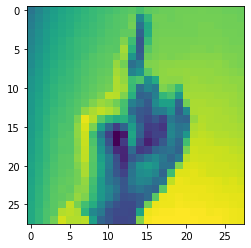

In [ ]:
# Check labels
len(labels[0])

24

Checking our labels to make sure: 24 labels is correct.

In [ ]:
xtrain, xtest, ytrain, ytest = train_test_split(images, labels, test_size= 0.3, random_state=101)

In [ ]:
# Inspect an image
#index =2
#print(labels[index])
#plt.imshow(images[index].reshape(7,9))
#plt.imshow(images[index])

In [ ]:
# Normalize data & scale our images
xtrain = xtrain / 255
xtest = xtest / 255
# Reshape the data into 4-dimensional shape
# So our convolutional neural network can actually take it in
xtrain = xtrain.reshape(xtrain.shape[0],3,21,1)
xtest = xtest.reshape(xtest.shape[0],3,21,1)

## 4. Building Our Model

### 4.1 Successful Attempt: Spiking Neural Network Model (SNN)

In [ ]:
# Hyperparameters
epochs = 10
val_split = .2

# Encode data to categorical form
from tensorflow.keras.utils import to_categorical

y_train = to_categorical(y_train.astype(int))
y_test = to_categorical(y_test.astype(int))

print(y_train.shape)
print(y_test.shape)

# Create callbacks
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

early_stop = EarlyStopping(monitor='val_acc',
                           restore_best_weights=True,
                           patience=10,
                           verbose=0)

reduce_lr = ReduceLROnPlateau(monitor='val_acc',
                              factor=0.2,
                              min_lr=0.00001,
                              patience=5,
                              verbose=0)

(5114, 24)
(2192, 24)


In [ ]:
from tensorflow.keras import Input, Model
from tensorflow.keras.layers import Dense, Flatten, AlphaDropout, LayerNormalization

inputs = Input(shape=x_train[0].shape, name='Landmark_Vectors')

layerNorm = LayerNormalization(name='LayerNorm')(inputs)

flatten = Flatten(name='Flatten_Vectors')(layerNorm)

dense_count = 6
dense_base = 48
out = flatten

for i in range(dense_count):
    units = (dense_count-i) * (dense_count-i) * dense_base
    dense = Dense(units, 
                  kernel_initializer="lecun_normal", 
                  bias_initializer="zeros", 
                  activation='selu',
                  name=f'Dense_{i+1}')
    a_dropout = AlphaDropout(0.05, name=f'Dropout_{i+1}')
    out = dense(out)
    out = a_dropout(out)

outputs = Dense(y_train[0].shape[0], activation='softmax', name='Output_Vector')(out)
model = Model(inputs=inputs, outputs=outputs, name="SNN_6")
model.summary()

Model: "SNN_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Landmark_Vectors (InputLaye  [(None, 21, 3)]          0         
 r)                                                              
                                                                 
 LayerNorm (LayerNormalizati  (None, 21, 3)            6         
 on)                                                             
                                                                 
 Flatten_Vectors (Flatten)   (None, 63)                0         
                                                                 
 Dense_1 (Dense)             (None, 1728)              110592    
                                                                 
 Dropout_1 (AlphaDropout)    (None, 1728)              0         
                                                                 
 Dense_2 (Dense)             (None, 1200)              207480

In [ ]:
from tensorflow.keras.optimizers import Adam

adam = Adam(learning_rate=0.001, beta_2=0.99, epsilon=0.01)

model.compile(loss='categorical_crossentropy',
              optimizer=adam,
              metrics=['acc'])

history = model.fit(x_train, y_train,
                      epochs=100,
                      batch_size=32,
                      validation_split=val_split,
                      callbacks=[early_stop, reduce_lr],
                      verbose=0)

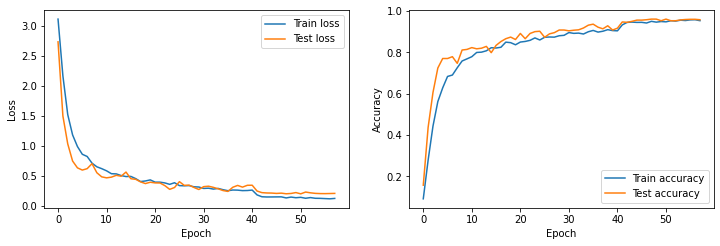

In [ ]:
plt.figure(figsize=(12, 8))

plt.subplot(2, 2, 1)
plt.plot(history.history['loss'], label='Train loss')
plt.plot(history.history['val_loss'], label='Test loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.subplot(2, 2, 2)
plt.plot(history.history['acc'], label='Train accuracy')
plt.plot(history.history['val_acc'], label='Test accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()


### Let's test our model.

In [ ]:
loss, acc = model.evaluate(x_test, y_test, verbose=0)
print(f'++++++++++++ Test data ++++++++++++\nloss={loss:.4f} acc={acc:.4f}')

++++++++++++ Test data ++++++++++++
loss=0.2864 acc=0.9316


We assess the prediction accuracy score of *93.16%* to be tolerable.

### Confusion Matrix


Now we check the performance measurement for machine learning classification with the aid of a confusion matrix, as we use multi-class classifiers.

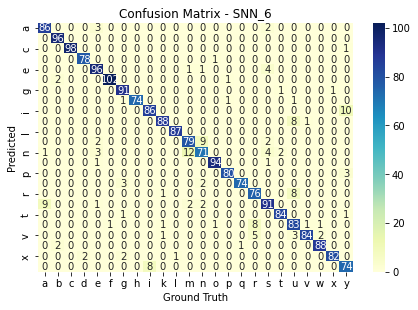

In [ ]:
from sklearn import metrics
import seaborn as sns

predictions = model.predict(x_test)
prediction_classes = np.argmax(predictions, axis=-1)

gt_classes = np.argmax(y_test, axis=-1)
confusion_matrix = metrics.confusion_matrix(gt_classes, prediction_classes)

sns.heatmap(pd.DataFrame(confusion_matrix, index=classes, columns=classes), annot=True, cmap="YlGnBu", fmt='d')
plt.tight_layout()
plt.title('Confusion Matrix - ' + model.name, y=1.1)
plt.ylabel('Predicted')
plt.xlabel('Ground Truth')
plt.show()

A confusion matrix visualises the performance of an algorithm.

Each row of the matrix represents the instances in a predicted class while each column represents the instances in an actual class or vice versa. 


### 4.2 First Attempt - Create a CNN Model

This model did not work for our GSL data due to reshaping issues.
However, these are the results we obtained for an ASL dataset. The static alphabet is similar in both languages.

In [174]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Dropout

In [ ]:
# Building our CNN model
# Use a sequential model
model = Sequential()
# Add convolutional layer with 64 filters, which are 3 by 3
# Relu activation normalizes the pixel values
# Then pass in our input shape, which is a 28 by 28 image with 1-dim channel
model.add(Conv2D(64, kernel_size=(3,3), activation='relu', input_shape=(28,28,1)))
# Add maxpool, which will set max value out of every convolutional pool layer
model.add(MaxPooling2D(pool_size=(2,2), padding='same'))

model.add(Conv2D(64, kernel_size=(3,3), activation='relu', input_shape=(28,28,1)))
model.add(MaxPooling2D(pool_size=(2,2), padding='same'))

model.add(Conv2D(64, kernel_size=(3,3), activation='relu', input_shape=(28,28,1)))
model.add(MaxPooling2D(pool_size=(2,2),padding='same'))

model.add(Flatten())
# Feed forward network with 128 units
model.add(Dense(128, activation='relu'))
# Drop out to prevent overfitting
# Overfitting = model memorizes data instead of actually learning it
model.add(Dropout(0.2))
# 24 dense unit for the 24 classes/letters
# Softmax to get the probability
model.add(Dense(24, activation='softmax'))

In [ ]:
from tensorflow import keras

In [ ]:
# Change our loss function to categorical cross entropy because we have multiple categories
model.compile(loss= keras.losses.categorical_crossentropy, optimizer=keras.optimizers.Adam(), metrics=['accuracy'])

In [ ]:
print(model.summary())

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 26, 26, 64)        640       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 13, 13, 64)       0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 11, 11, 64)        36928     
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 3, 3, 64)          36928     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 1, 1, 64)        

In [ ]:
# Now we can train our model
# Change number of epochs
history = model.fit(xtrain,ytrain, validation_data=(xtest,ytest), epochs=80, batch_size=128)

In [ ]:
# Saving Model
model.save('MNIST-80epochs')
print("Model Saved")

Model Saved


In [182]:
# View training history graphically
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title("Accuracy")
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train' , 'Test'])
plt.show()

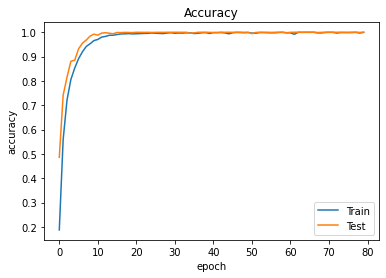

Train accuracy is infintesimally smaller than test accuracy, they approach the same accuracy. This can be considered feasible for further progress.

In [ ]:
# Preparing test data
test_labels = test['label'].values
test.drop('label', axis=1, inplace=True)
test.shape

(7172, 784)

In [ ]:
# Prepare test images
test_labels = lbz.fit_transform(test_labels)
test_images = test.values
test_images = np.array([np.reshape(i, (28,28)) for i in test_images])
test_images = np.array([i.flatten() for i in test_images])
test_images = test_images.reshape(test_images.shape[0], 28, 28, 1)

In [ ]:
pred = model.predict(test_images)

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(test_labels, pred.round())

0.8846904629113218

A prediction accuracy score of *88.47%* leaves room for improvement.

### Let's test our model on some images

In [ ]:
# Visualise some of the test images
# This is a "C"
plt.imshow(test_images[20].reshape(28,28))

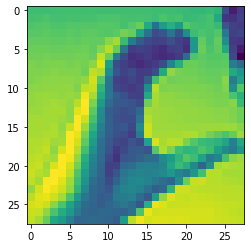

This is a "C" - What would our model predict fot this image?

In [ ]:
# What would our model predict for this image?
model.predict(test_images[20].reshape(1,28,28,1))

array([[0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

Model correctly predicts a C.

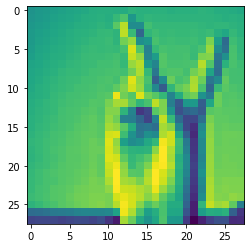

In [ ]:
# Visualise some of the test images
# This is a "V"
plt.imshow(test_images[12].reshape(28,28))

This is a "V" - what would our model predict?

In [ ]:
# What would our model predict for this image?
model.predict(test_images[12].reshape(1,28,28,1))

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 1., 0., 0., 0.]], dtype=float32)

Model correctly predicts a V.

## 5. Outlook: Webcam Incorporation

In pursuance of incorporating webcameras, we experimented with two methods for real-time sign language detection.

Unfortunately, we have not yet been able to get past the various error messages, but we are confident that we will.

Future plans call for the project to be expanded even further so that it can actively video recognize complete words and sentences in addition to the GSL alphabet using a webcam. 

In [ ]:
# Create function to match label to letter
import cv2
import numpy as np
def getLetter(result):
    classLabels = { 0: 'A',
                  1: 'B',
                  2: 'C',
                  3: 'D',
                  4: 'E',
                  5: 'F',
                  6: 'G',
                  7: 'H',
                  8: 'I',
                  9: 'K',
                  10: 'L',
                  11: 'M',
                  12: 'N',
                  13: 'O',
                  14: 'P',
                  15: 'Q',
                  16: 'R',
                  17: 'S',
                  18: 'T',
                  19: 'U',
                  20: 'V',
                  21: 'W',
                  22: 'X',
                  23: 'Y'}

In [ ]:
cap = cv2.VideoCapture(0)

while True:
  
  ret, frame = cap.read()
  frame = cv2.flip(frame, 1)

  # Define region of interest
  roi = frame[100:400, 320:620]
  cv2.imshow('roi', roi)
  roi = cv2.cvtColor(roi, cv2.COLOR_BGR2GRAY)
  roi = cv2.resize(roi, (28,28), interpolation = cv2.INTER_AREA)
  cv2.imshow('roi sacled and grey', roi)
  copy=frame.copy()
  cv2.rectangle(copy, (320, 100), (620, 400), (255,0,0), 5)

  roi=roi.reshape(1,28,28,1)

  result= str(model.predict_classes(roi, 1, verbose=0)[0])
  cv2.putText(copy, getLetter(result), (300, 100), cv2.FONT_HERSHEY_COMPLEX, 2, (0, 255, 0), 2)
  cv2.imshow('frame', copy)

  #13 is the ENTER Key
  if cv2.waitKey(1) == 13:
    break 
  
  cap.release()
  cv2.destroyAllWindows()

In [180]:
import cv2
import numpy as np
#!pip onnxruntime
!pip install onnx
!pip install onnxruntime
import onnxruntime as ort

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [179]:
def center_crop(frame):
    h, w, _ = frame.shape
    start = abs(h - w) // 2
    if h > w:
        return frame[start: start + w]
        return frame[ start: start + h]
def main():
  # Constants
  index_to_letter = list('ABCDEFGHIKLMNOPQRSTUVWXY')
  mean = 0.485 * 255.
  std = 0.229 * 255.
  
  # Create runnable session with exported model
  ort_session = ort.InferenceSession("signlanguage.onnx")
  
  cap = cv2.VideoCapture(0)
  while True:
    # Capture frame-by-frame
    ret, frame = cap.read()
    
    # Preprocess data
    frame = center_crop(frame)
    frame = cv2.cvtColor(frame, cv2.COLOR_RGB2GRAY)
    x = cv2.resize(frame, (28, 28))
    x = (x - mean) / std
    
    x = x.reshape(1, 1, 28, 28).astype(np.float32)
    y = ort_session.run(None, {'input': x})[0]
    
    index = np.argmax(y, axis=1)
    letter = index_to_letter[int(index)]
    
    cv2.putText(frame, letter, (100, 100), cv2.FONT_HERSHEY_SIMPLEX, 2.0, (0, 255, 0), thickness=2)
    cv2.imshow("Sign Language Translator", frame)
    
    if cv2.waitKey(1) & 0xFF == ord('q'):
      break
    
  cap.release()
  cv2.destroyAllWindows()
  if __name__ == '__main__':
    main()